# In-Class Quiz Nº 1

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q1.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$
### Consider the $\texttt{breast_cancer}$ dataset of $\texttt{sklearn}$, divided into two sub-sets, training/testing, according to the commands in the next cell.
* ### X1: training data ($400\times30$ array)
* ### y1: classes of the training data
* ### X2: test data (array de $169\times30$)
* ### y2: classes of the test data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D = DT.load_breast_cancer()
X = D.data
y = D.target

################################################################
# Consider malignant cases as positive (class 1)
# Need to invert classes
y = np.abs(y - 1)
################################################################

# division int training and test sub-sets
X1, X2, y1, y2 = train_test_split(X, y, test_size=169, stratify=y, random_state=42)


# Question 1: Logistic Discriminants
##  Consider a logistic discriminant with the following parameters $\texttt{C=2}$, $\texttt{solver='saga'}$, $\texttt{penalty='l1'}$ and $\texttt{max_iter=5000}$. Train the classifier with the training set.
### a) Print the total number of errors and the confusion matrix  (non-normalized) of this classifier for the test set.
### b) Calibrate this classifier in order to have a maximum number of false negatives in the test less than or equal to 5, while keeping the total number of errors below 15.¶
### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operational point of the classifiers in items 1.a) and 1.b).

## 1.a)

In [ ]:
logD = LogisticRegression(penalty="l1", solver="saga", C=2, max_iter=5000).fit(X1, y1)
y2e = logD.predict(X2)
print("Total number of errors", np.sum(y2 != y2e))
print("Confusion Matrix:")
print(confusion_matrix(y2, y2e))



Total number of errors 13
Confusion Matrix:
[[105   1]
 [ 12  51]]


## 1.b)

In [ ]:
y2c = logD.decision_function(X2)
min(y2c),max(y2c) 

(-5.084149955547839, 68.07773372059916)

In [ ]:
y2c = logD.decision_function(X2)
thresh = -1.55
print("Total number of errors", np.sum(y2 != (y2c > thresh)))
print("Confusion Matrix:")
print(confusion_matrix(y2, y2c > thresh))
# (tn, fp), (fn, tp) = confusion_matrix(y2, y2c > thresh)

# [TN, FP]
# [FN, TP] 

(tn, fp), (fn, tp) = confusion_matrix(y2, y2c > thresh)
fp_rate = fp / (tn+ fp)
recall = tp / (tp + fn)

precision = tp / (tp + fp)

# f1 = CM[0,1] / (CM[0,1] + CM[0,0])
# r1 = CM[1,1] / (CM[1,1] + CM[1,0])
# p1 = CM[1,1] / (CM[1,1] + CM[0,1])

# print(fp_rate, recall)

Total number of errors 15
Confusion Matrix:
[[96 10]
 [ 5 58]]


## 1.c)

0.08490566037735849 0.9206349206349206


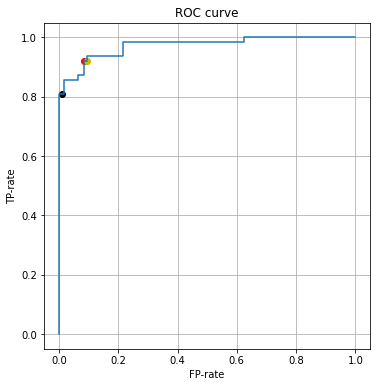

In [ ]:
fpr, tpr, t = roc_curve(y2, y2c)

# Classificador 1
# fp-rate=FP/(FP+TN)
p11 = 1 / (105 + 1)
# tp-rate=TP/(TP+FN)
p12 = 51 / (51 + 12)

# Classificador 2
# fp-rate=FP/(FP+TN)
p21 = 9 / (97 + 9)
# tp-rate=TP/(TP+FN)
p22 = 58 / (5 + 58)

print(p21, p22)

plt.figure(figsize=(6, 6))
# plt.plot(p11, p12, "ok")
plt.plot(p21, p22, "or")

plt.plot(p11, p12, "ok") 
plt.plot(fp_rate, recall, "oy")

plt.plot(fpr, tpr)
plt.axis("scaled")
plt.grid(True)
plt.title("ROC curve")
plt.xlabel("FP-rate")
plt.ylabel("TP-rate")
plt.show()


<hr style="border:2px solid black"> </hr>

# Question 2 - SVMs:
## Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
### a) Preprocess the data using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the pre-processed data in the following items.
### b) Train the $\texttt{SVC}$ classifier with the training data and plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.
### c)  Calibrate the classifier from the previous section to obtain one (1) false negative in the test data. After calibration, what is the minimum number of false positives obtained in the test set?¶

## 2.a)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)


## 2.b)

[[106   0]
 [  3  60]]


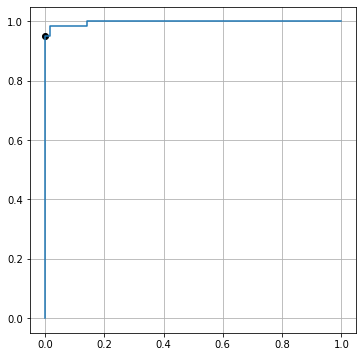

In [ ]:
svm = SVC(kernel="rbf", C=2).fit(X1n, y1)
y2c = svm.decision_function(X2n)
fpr, tpr, t = roc_curve(y2, y2c)

print(confusion_matrix(y2, svm.predict(X2n)))

# fp-rate=FP/(FP+TN)
p1 = 0
# tp-rate=TP/(TP+FN)
p2 = 60 / (3 + 60)

plt.figure(figsize=(6, 6))
plt.plot(p1, p2, "ok")
plt.plot(fpr, tpr)
plt.axis("scaled")
plt.grid(True)


## 2.c)

In [ ]:
print(confusion_matrix(y2, y2c >= -0.35))
print("Number of false positives = 2")


[[104   2]
 [  1  62]]
Number of false positives = 2


- 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as DT
import numpy.random as rd
import sklearn

import tensorflow as tf


(X1, y1), (X2, y2) = DT.fashion_mnist.load_data()
print("Training set:", X1.shape, X1.dtype)
print("Test set:    ", X2.shape, X2.dtype)


Training set: (60000, 28, 28) uint8
Test set:     (10000, 28, 28) uint8


In [ ]:

# X1=X1*1.
# X2=X2*1.

In [ ]:
X1 = X1.reshape((X1.shape[0], X1.shape[1] ** 2)) * 1.0
X2 = X2.reshape((X2.shape[0], X2.shape[1] ** 2)) * 1.0

print(X1.shape, y1.shape)
print(X2.shape, y2.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
y1 = (y1 == 0 ) | (y1 == 6) *1
y2 = (y2 == 0 ) | (y2 == 6) *1
print(np.unique(y1), y1.shape, y2.shape)

[0 1] (60000,) (10000,)


In [ ]:
np.unique(y2)

array([0, 1])

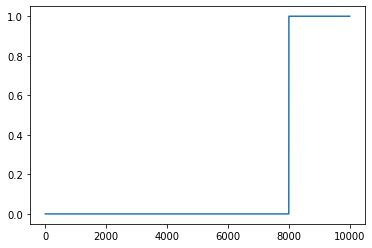

In [ ]:
idx = np.argsort(y2)
y2 = y2[idx]

y2 = (y2 == 0 ) | (y2 == 6) *1

X2 = X2[idx]
plt.plot(y2)
# plt.plot(X2)


In [ ]:
idx = rd.permutation(X1.shape[0])
X1 = X1[idx]
y1 = y1[idx]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold


parameters=[{'max_depth':[5, 10, 15],'n_estimators':[50, 100, 150]}]

cv=StratifiedKFold(n_splits=2,shuffle=True, random_state=42) # ja tem o conjunto de validacao
rnd = RandomForestClassifier()      
gscv=GridSearchCV(rnd, parameters, n_jobs=10, cv=cv)
grid_search=gscv.fit(X1, y1) # fazer com conjunto de validacao
grid_search.best_params_



{'max_depth': 15, 'n_estimators': 150}

In [ ]:
grid_search.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
# correr o modelo com os melhores parametros e 
rnd = RandomForestClassifier(**grid_search.best_params_, n_jobs=10).fit(X1, y1)


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
y2e = rnd.predict(X2)
print(confusion_matrix(y2, y2e))

[[7891  109]
 [ 383 1617]]


In [ ]:
np.unique(y1)

array([0, 1])

# Avaliar a curva roc, auc para ver se ta calibrado

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
rfc_pred = rnd.predict_proba(X2)[:, 1] # mantendo as probabilidades somente para saída positiva
rfc_pred.shape

(10000,)

In [ ]:
 

y_pred = (rfc_pred > 0.1) * 1 #best_threshold
# print(y2, y_pred)
precision = precision_score(y2, y_pred)
recall = recall_score(y2, y_pred)
f1_score = f1_score(y2, y_pred)



# Calculando as curvas ROC e PR
fp, tp, t = roc_curve(y2, rfc_pred)
pre, rec, lim = precision_recall_curve(y2, rfc_pred)

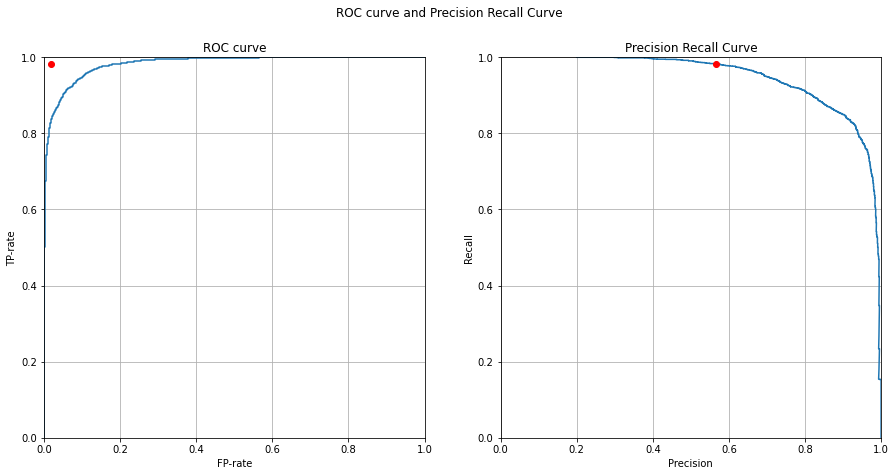

In [ ]:

# Criando a figura e os subplots
fig, (roc, prc) = plt.subplots(1, 2, figsize=(15, 7))
CM = confusion_matrix(y2, y2e)
fprate = CM[0,1]/(CM[0,1]+ CM[0,0])
# Configurando o subplot para a curva ROC
roc.set(title="ROC curve",
        xlabel="FP-rate",
        ylabel="TP-rate",
        xlim=(0, 1),
        ylim=(0, 1))
roc.plot(fp, tp)
roc.plot(fprate,  recall,  "or")
roc.grid(True)

# Configurando o subplot para a curva PR
prc.set(title="Precision Recall Curve",
        xlabel='Precision',
        ylabel='Recall',
        xlim=(0, 1),
        ylim=(0, 1))
prc.plot(pre, rec)
prc.plot(precision, recall, "or")

prc.grid(True)

# Configurando o título da figura e mostrando a figura
fig.suptitle('ROC curve and Precision Recall Curve')
plt.show()


In [ ]:
#  ROC and precision/recall curves are a simple way to visually compare the performances of the two classifiers.
# Estrategias para avaliar matrizes:
#     se sim mais, FN menos, e o ponto sobe
#     Queremos balanciar os erros dos dois lados da matriz, minimo
#     O melhor f1_score? grafico de tres linhas

# ha mais negativvos do que positivos?? sim
#  Random florest sao arvores de decisao, pelo que nao se importa com a escala.
#  Cada dimensao é um pixels. A maior que nao tem importancia, por nao por nao dizer nada sobre o objeto
 

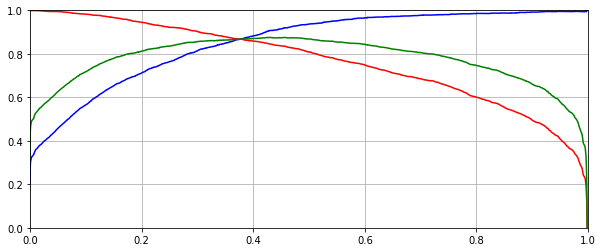

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(lim, pre[:-1], "b")
plt.plot(lim, rec[:-1], "r")
fsc = 2 * pre * rec / (pre + rec)
plt.plot(lim, fsc[:-1], "g")

# plt.plot(0, precision, "or")
# plt.plot(0, recall, "or")
# plt.plot(lim2, p2, "ob")
# plt.plot(lim2, r2, "ob")
# plt.plot(lim3, p3, "og")
# plt.plot(lim3, r3, "og")

plt.axis([np.floor(lim.min()), np.ceil(lim.max()), 0, 1])
plt.grid(True)


### Outro classificador

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X1)
X1 = sc.transform(X1)
X2 = sc.transform(X2)


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X1, y1)
y2e = sgd.predict(X2)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))
print()

[[7636  364]
 [ 517 1483]]
Total number of erros 881 (in 10000)



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
sgd_pred = sgd.decision_function(X2) # mantendo as probabilidades somente para saída positiva
sgd_pred.shape

(10000,)

In [ ]:
y_pred = (sgd_pred > 0.1) * 1 #best_threshold
# print(y2, y_pred)
precision = precision_score(y2, y_pred)
recall = recall_score(y2, y_pred)
f1_score = f1_score(y2, y_pred)



# Calculando as curvas ROC e PR
fp, tp, t = roc_curve(y2, sgd_pred)
pre, rec, lim = precision_recall_curve(y2, sgd_pred)

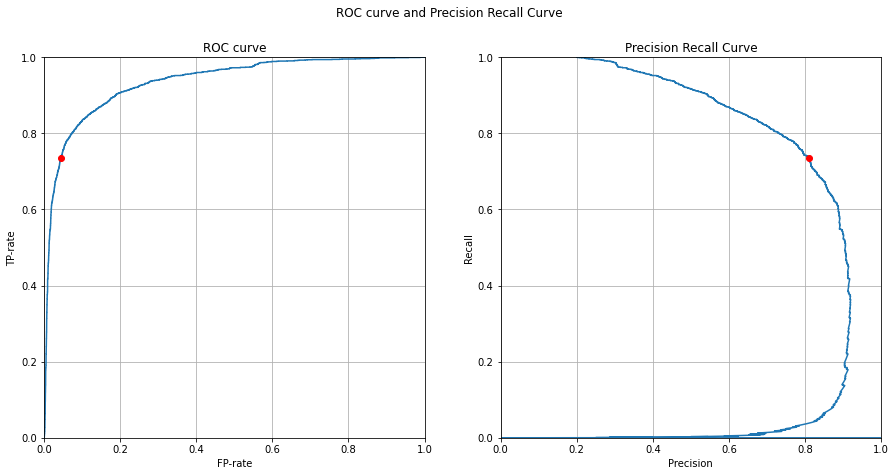

In [ ]:
# Criando a figura e os subplots
fig, (roc, prc) = plt.subplots(1, 2, figsize=(15, 7))
CM = confusion_matrix(y2, y2e)
fprate = CM[0,1]/(CM[0,1]+ CM[0,0])
# Configurando o subplot para a curva ROC
roc.set(title="ROC curve",
        xlabel="FP-rate",
        ylabel="TP-rate",
        xlim=(0, 1),
        ylim=(0, 1))
roc.plot(fp, tp)
roc.plot(fprate,  recall,  "or")
roc.grid(True)

# Configurando o subplot para a curva PR
prc.set(title="Precision Recall Curve",
        xlabel='Precision',
        ylabel='Recall',
        xlim=(0, 1),
        ylim=(0, 1))
prc.plot(pre, rec)
prc.plot(precision, recall, "or")

prc.grid(True)

# Configurando o título da figura e mostrando a figura
fig.suptitle('ROC curve and Precision Recall Curve')
plt.show()


In [ ]:
# Mudar a referencia de dados e eleminar dados superfolos
# Sabendo que os dados sao diretamente proporcionados , as variaveis sao fortemente correlaciondas
# Componentes principais-> calcular a matriz de covariancia e decompar.. para obter
# Nova base de dimensoes- a 1 componente prnciapas ls é que detertmina pela variavel 
# que determina mais, logo quere-se que guardar as dimensoes que tem relevancias, eliminando-se as que nao tem relevancia

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True).fit(X1)
X1p = pca.transform(X1)
X2p = pca.transform(X2)
print("Nº of Principal Components kept: %d" % X1p.shape[1])

Nº of Principal Components kept: 137


In [ ]:
# Apos pca aplicar normalizacao- braqueimento 
pca.components_.shape

(137, 784)

In [ ]:
print(np.round(pca.explained_variance_ratio_, 2)[:10])

[0.22 0.14 0.05 0.05 0.04 0.03 0.03 0.02 0.02 0.01]


In [ ]:
np.sum(np.round(pca.explained_variance_ratio_, 2)[:25])

0.7300000000000001

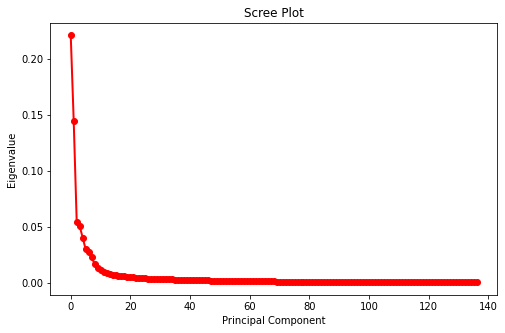

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot (pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

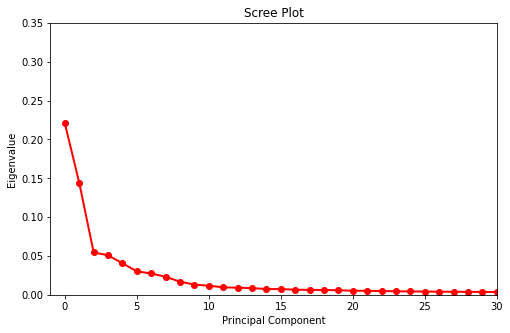

In [ ]:

fig = plt.figure(figsize=(8,5))
plt.plot (pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlim([-1, 30])
plt.ylim([0, 0.35])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()